In [25]:
import os
import json
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def flatten_dict(d):
    out = {}
    for key, val in d.items():
        if isinstance(val, dict):
            val = [val]
        if isinstance(val, list):
            for subdict in val:
                deeper = flatten_dict(subdict).items()
                out.update({key + '.' + key2: val2 for key2, val2 in deeper})
        else:
            out[key] = val
    return out

folders = [
    "../lbrl_multirun/2022-04-07/23-51-42_linucb",
    "../lbrl_multirun/2022-04-07/23-57-55_leader",
    "../lbrl_multirun/2022-04-08/00-00-00_leaderselect"
]
df = None
result_keys = []
fcnt = 0
for rootdir in folders:
    for file in os.listdir(rootdir):
        d = os.path.join(rootdir, file)
        if os.path.isdir(d):
            if os.path.exists(os.path.join(d, "config.json")):
                fcnt+=1
                with open(os.path.join(d, "config.json"), "r") as jf:
                    config = json.load(jf)
                    config = flatten_dict(config)

                with open(os.path.join(d, "result.pkl"), "rb") as jf:
                    results = pickle.load(jf)
                # rank = config['newrank']
                # algo = config['algo']
                # layers = config['layers']
                # name = f"{algo}_{rank}_{layers}"
                for k in results.keys():
                    config[k] = [results[k]]
                
                result_keys = np.unique(result_keys + list(results.keys())).tolist()
                # else:
                #     assert np.all([el in result_keys for el in results.keys()])
                tdf = pd.DataFrame.from_dict(config)
                if df is None:
                    df = tdf
                else:
                    df = pd.concat((df,tdf))
            else:
                print(f"{d} not finished")



assert df.shape[0] == fcnt
print(f"result_keys:\n {result_keys}")
print(f"df.columns.to_list():\n {df.columns.to_list()}")

result_keys:
 ['hist_active_reps', 'hist_mineig', 'hist_mse', 'hist_normalized_rep_scores', 'hist_selected_rep', 'hist_time_updates', 'regret', 'selected_rep']
df.columns.to_list():
 ['algo', 'bonus_scale', 'check_every', 'contextgeneration', 'delta', 'dim', 'feature_expansion', 'horizon', 'linucb_rep', 'narms', 'ncontexts', 'noise_param', 'noise_std', 'noise_type', 'normalize_mineig', 'num_nonrealizable', 'seed', 'seed_problem', 'ucb_regularizer', 'regret', 'selected_rep', 'hist_mineig', 'hist_normalized_rep_scores', 'hist_selected_rep', 'hist_active_reps', 'hist_mse', 'hist_time_updates']


In [26]:
df

,algo,bonus_scale,check_every,contextgeneration,delta,dim,feature_expansion,horizon,linucb_rep,narms,...,seed_problem,ucb_regularizer,regret,selected_rep,hist_mineig,hist_normalized_rep_scores,hist_selected_rep,hist_active_reps,hist_mse,hist_time_updates
0,linucb,0.1,1,gaussian,0.01,10,none,20000,10,5,...,3,1,"[3.81770260810176, 6.980519172996605, 7.759417...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,9,5,...,3,1,"[0.0, 0.0, 0.0, 0.4248424366047022, 3.32577022...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,13,5,...,3,1,"[1.3344709428655683, 5.078884480472276, 8.2954...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,4,5,...,3,1,"[1.3344709428655683, 5.078884480472276, 8.2954...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,0,5,...,3,1,"[3.81770260810176, 6.980519172996605, 8.017968...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,5,5,...,3,1,"[1.3344709428655683, 5.078884480472276, 8.2954...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,3,5,...,3,1,"[1.3344709428655683, 5.078884480472276, 8.2954...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,14,5,...,3,1,"[1.3344709428655683, 5.078884480472276, 8.2954...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,8,5,...,3,1,"[3.81770260810176, 6.980519172996605, 8.017968...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,linucb,0.1,1,gaussian,0.01,10,none,20000,3,5,...,3,1,"[3.81770260810176, 6.980519172996605, 8.017968...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


keys for grouping:  ['algo', 'linucb_rep', 'normalize_mineig']
('leader', 0, True)
('leaderselect', 0, False)
('leaderselect', 0, True)
('linucb', 0, True)
('linucb', 1, True)
('linucb', 2, True)
('linucb', 3, True)
('linucb', 4, True)
('linucb', 5, True)
('linucb', 6, True)
('linucb', 7, True)
('linucb', 8, True)
('linucb', 9, True)
('linucb', 10, True)
('linucb', 11, True)
('linucb', 12, True)
('linucb', 13, True)
('linucb', 14, True)


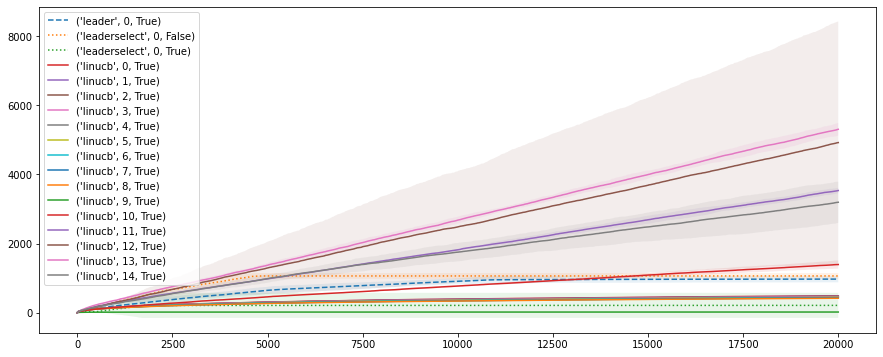

In [27]:
keys = df.columns[~df.columns.isin(result_keys+['seed'])]
m2 = (df[keys] == df[keys].iloc[0]).all()
gk = keys[~m2].values.tolist()
print("keys for grouping: ", gk)
if len(gk) == 0:
    gk = "algo"
    print("new keys for grouping: ", gk)
grouped = df.groupby(gk)

plt.figure(figsize=(15,6))
for name, group in grouped:
    print(name)
    regrets = np.stack(group['regret'].values, axis=0)
    mean_regret = regrets.mean(axis=0)
    std_regret = regrets.std(axis=0)
    if "leader" in name:
        plt.plot(mean_regret, "--", label=f"{name}")
    elif "leaderselect" in name:
        plt.plot(mean_regret, ":", label=f"{name}")
    else:
        plt.plot(mean_regret, label=f"{name}")
    plt.fill_between(np.arange(regrets.shape[1]), mean_regret -2*std_regret, mean_regret+2*std_regret, alpha=0.1)

plt.legend(loc='upper left')

